# Asymmetric plasmid compatibility simulated as a Lotka-Volterra system
This model is part of Chaillou and Stamou et al., The Directed evolution of colE1 plasmid replication compatibility: a fast tractable tunable model for investigating biological orthogonality. 

Vitor Pinheiro (v1.0) - 15.05.22

In [1]:
## Packages required for calculation and visualization
using DifferentialEquations
using Plots


## Setting up a 2-population Lotka-Volterra (LV) system

In [2]:
function two_plasmid_competition!(du, u, p, t) ## 2-population generic LV system
    A, B = u
    a1, a2, a3, b1, b2, b3 = p
    du[1] = dA = a1*A - a2*A^2 + a3*A*B
    du[2] = dB = b1*B - b2*B^2 + b3*A*B
end

two_plasmid_competition! (generic function with 1 method)

In [3]:
## Parameters
a1 = 1  #= For simplicity we have placed a1 and b1 as 1. Consequently, time does not represent a convenient unit (e.g. minutes)=#
a2 = 1/100 ## a1/a2 is the carrying capacity of plasmid A
#= More accurately, the carrying capacity needs to be represented as 1/(x+y), where x refers to the carrying capacity
 without antibiotic selection and y is the increase in copy number driven by antibiotic selection =#
a3 = - 7/1000 ## impact of B on A
b1 = 1
b2 = 1/50 ## b1/b2 is the carrying capacity of plasmid B
b3 = - 17/1000 ## impact of A on B

## Initial conditions
#= Because experimentally cells are grown in the presence of both antibiotics, the initial conditions 
should be the carrying capacity of each of the plasmids. Nevertheless, this type of LV system always converges
towards a single equilibrium point. Therefore most starting conditions will lead to the same long-term result =#
a0 = 1/a2
b0 = 1/b2

## Reformatting parameters for function 
p = [a1, a2, a3, b1, b2, b3]
u0 = [a0, b0];

In [4]:
## Solution

#= While the LV system can be solved analytically, we provide here the numerical solution to avoid having to introduce error 
    checking for equilibrium positions that are not in the real positive space for both populations. =#
tspan = (0.0, 100.0)  # gives the model 100 units of time to run
problem = ODEProblem(two_plasmid_competition!, u0, tspan, p)
solution = solve(problem, AutoVern7(Rodas5()), dt=0.1)

solution(100)  ## returns the two plasmid populations at t = 100

2-element Vector{Float64}:
 99.9999955110674
  2.621838197958631e-15

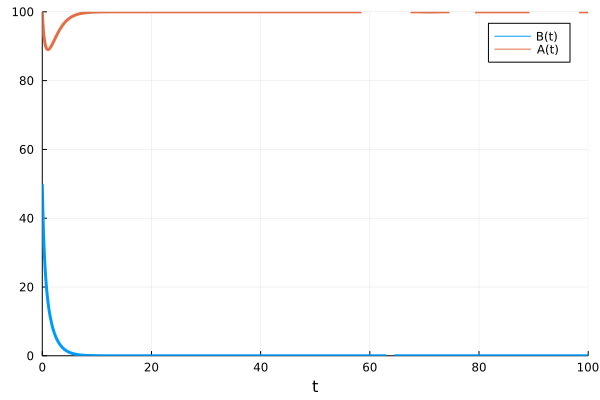

In [5]:
## Plots the two populations as a function of time
plot(solution, vars=(0,2), linewidth = 3, ylims = (0.0,max(a0,b0)), label = "B(t)")
plot!(solution, vars=(0,1), linewidth = 3, label = "A(t)")

## Analysing the parameter space of a 2-population LV system

In [6]:
## Solving the predicted interaction across a large window of interaction parameters
a3_range = -0.02:0.0001:0  # sets up the range of the investigation
b3_range = -0.02:0.0001:0

results_A = zeros(length(a3_range), length(b3_range)) # prepares a matrix for entering the results
results_B = zeros(length(a3_range), length(b3_range))

for i = 1:length(a3_range)
    for j = 1:length(b3_range)
        a3 = a3_range[i]
        b3 = b3_range[j]
        p = [a1, a2, a3, b1, b2, b3]
        u0 = [a0, b0];
        tspan = (0.0, 100.0)  # gives the model 100 units of time to run
        problem = ODEProblem(two_plasmid_competition!, u0, tspan, p)
        solution = solve(problem, AutoVern7(Rodas5()), dt=0.1)

        results_A[i,j] = solution(100)[1]
        results_B[i,j] = solution(100)[2]     
    end
end



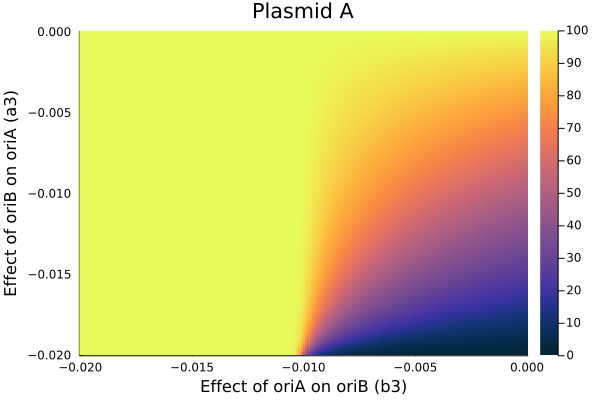

In [7]:
## Effect on population A
heatmap(a3_range, b3_range, results_A, c = :thermal, xlabel = "Effect of oriA on oriB (b3)",
 ylabel = "Effect of oriB on oriA (a3)", title = "Plasmid A", clims = (0.0,max(a0,b0)))

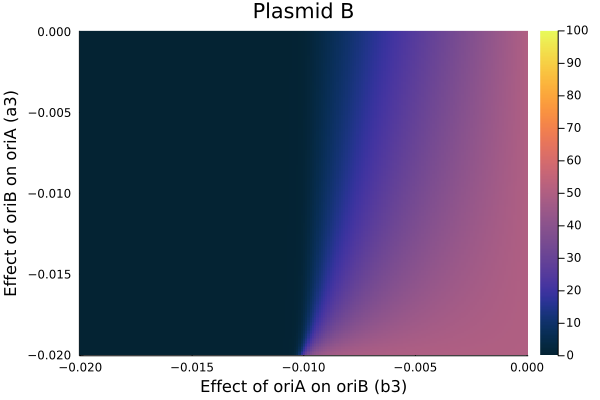

In [8]:
## Effect on population B
heatmap(a3_range, b3_range, results_B, c = :thermal, xlabel = "Effect of oriA on oriB (b3)",
 ylabel = "Effect of oriB on oriA (a3)", title = "Plasmid B", clims = (0.0,max(a0,b0)))
 

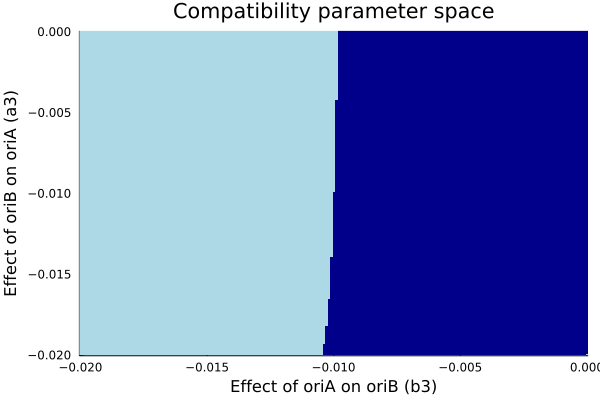

In [9]:
## Determining areas of co-existence
compatibility = zeros(length(a3_range), length(b3_range)) # prepares a matrix for entering the results

for n = 1: length(results_A)
    if results_A[n] <= 1 || results_B[n] <= 1
        #= Because the system is continuous, it tolerates very small numbers which would have no real meaning
        in a discrete system. As such, we have used here a cut-off of 1, below which the discrete nature of the real system 
        would break down =#
        compatibility[n] = 0.0
    else
        compatibility[n] = 1.0
    end
end
heatmap(a3_range, b3_range, compatibility, c = :blues, colorbar=false, xlabel = "Effect of oriA on oriB (b3)",
ylabel = "Effect of oriB on oriA (a3)", title = "Compatibility parameter space")

# light blue = incompatible, dark blue = compatible

## Analysing 2-plasmid populations based on the dPCR data obtained

In [10]:
## From our dPCR data we have that:

#=  G4: a2 = 1/48
  F4: a2 = 1/73
  D4.2: a2 = 1/117
  G6: a2 = 1/203
  D4.1: a2 = 1/441
  WT: a2 = 1/774
  when in the presence of antibiotics in the media.
  
  Let's say that antibiotic selection doubles the copy number of a plasmid.
  The nature of the change is not important, as long as there is a change.
  =#


### Example 1A: D4.1 (A) vs G6 (B) - with G6 under selection


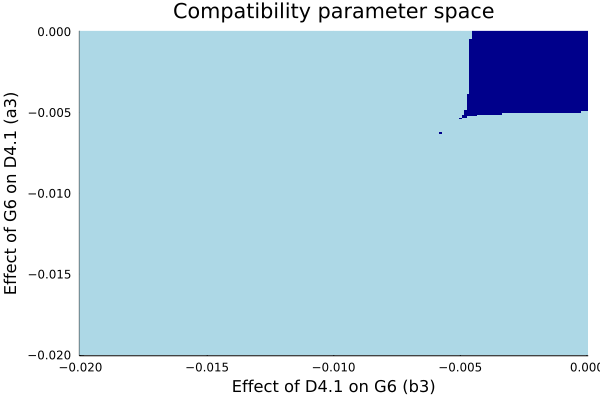

In [11]:
a2 = 2/441 ## a1/a2 is the carrying capacity of plasmid A
b2 = 1/203 ## b1/b2 is the carrying capacity of plasmid B
a0 = 1/a2
b0 = 1/b2


## Solving the predicted interaction across a large window of interaction parameters
a3_range = -0.02:0.0001:0  # sets up the range of the investigation
b3_range = -0.02:0.0001:0

results_A = zeros(length(a3_range), length(b3_range)) # prepares a matrix for entering the results
results_B = zeros(length(a3_range), length(b3_range))

for i = 1:length(a3_range)
    for j = 1:length(b3_range)
        a3 = a3_range[i]
        b3 = b3_range[j]
        p = [a1, a2, a3, b1, b2, b3]
        u0 = [a0, b0];
        tspan = (0.0, 100.0)  # gives the model 100 units of time to run
        problem = ODEProblem(two_plasmid_competition!, u0, tspan, p)
        solution = solve(problem, AutoVern7(Rodas5()), dt=0.1)

        results_A[i,j] = solution(100)[1]
        results_B[i,j] = solution(100)[2]     
    end
end

## Determining areas of co-existence
compatibility_d41tog6 = zeros(length(a3_range), length(b3_range)) # prepares a matrix for entering the results

for n = 1: length(results_A)
    if results_A[n] <= 1 || results_B[n] <= 1
        #= Because the system is continuous, it tolerates very small numbers which would have no real meaning
        in a discrete system. As such, we have used here a cut-off of 1, below which the discrete nature of the real system 
        would break down =#
        compatibility_d41tog6[n] = 0.0
    else
        compatibility_d41tog6[n] = 1.0
    end
end
heatmap(a3_range, b3_range, compatibility_d41tog6, c = :blues, colorbar=false, xlabel = "Effect of D4.1 on G6 (b3)",
ylabel = "Effect of G6 on D4.1 (a3)", title = "Compatibility parameter space")

# light blue = incompatible, dark blue = compatible

### Example 1B: D4.1 (A) vs G6 (B) - with D4.1 under selection

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase C:\Users\vbbpi\.julia\packages\SciMLBase\Vg9hW\src\integrator_interface.jl:331


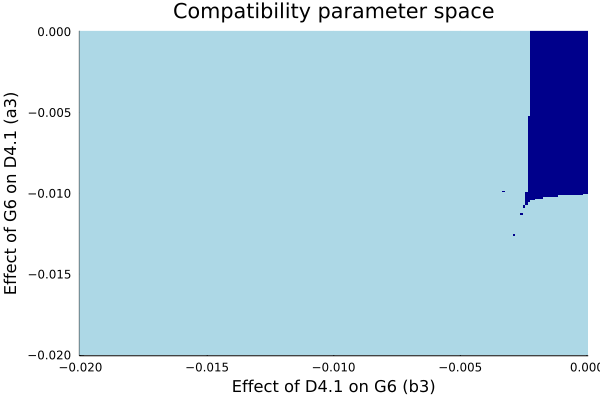

In [12]:
a2 = 1/441 ## a1/a2 is the carrying capacity of plasmid A
b2 = 2/203 ## b1/b2 is the carrying capacity of plasmid B
a0 = 1/a2
b0 = 1/b2


## Solving the predicted interaction across a large window of interaction parameters
a3_range = -0.02:0.0001:0  # sets up the range of the investigation
b3_range = -0.02:0.0001:0

results_A = zeros(length(a3_range), length(b3_range)) # prepares a matrix for entering the results
results_B = zeros(length(a3_range), length(b3_range))

for i = 1:length(a3_range)
    for j = 1:length(b3_range)
        a3 = a3_range[i]
        b3 = b3_range[j]
        p = [a1, a2, a3, b1, b2, b3]
        u0 = [a0, b0];
        tspan = (0.0, 100.0)  # gives the model 100 units of time to run
        problem = ODEProblem(two_plasmid_competition!, u0, tspan, p)
        solution = solve(problem, AutoVern7(Rodas5()), dt=0.1)

        results_A[i,j] = solution(100)[1]
        results_B[i,j] = solution(100)[2]     
    end
end

## Determining areas of co-existence
compatibility_g6tod41 = zeros(length(a3_range), length(b3_range)) # prepares a matrix for entering the results

for n = 1: length(results_A)
    if results_A[n] <= 1 || results_B[n] <= 1
        #= Because the system is continuous, it tolerates very small numbers which would have no real meaning
        in a discrete system. As such, we have used here a cut-off of 1, below which the discrete nature of the real system 
        would break down =#
        compatibility_g6tod41[n] = 0.0
    else
        compatibility_g6tod41[n] = 1.0
    end
end
heatmap(a3_range, b3_range, compatibility_g6tod41, c = :blues, colorbar=false, xlabel = "Effect of D4.1 on G6 (b3)",
ylabel = "Effect of G6 on D4.1 (a3)", title = "Compatibility parameter space")

# light blue = incompatible, dark blue = compatible

### Example 1C: Identifying parameters that satisfy all experimental conditions

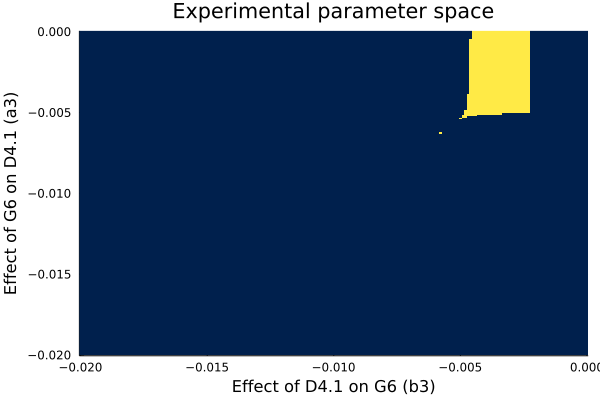

In [13]:
## Determining area of parameter space that explains the actual data

viable_parameters = zeros(length(a3_range), length(b3_range)) # starting an empty matrix

#= From experimental, we know that when D4.1 is selected, the plasmids are incompatible.
When G6 is selected, the plasmids are compatible. Therefore the viable parameter space
is where compatibility_g6tod41 is 0 but where compatibility_d41tog6 = 1 =#

for n = 1: length(compatibility_d41tog6)
    if compatibility_d41tog6[n] == 1.0 && compatibility_g6tod41[n] == 0.0
        viable_parameters[n] = 1.0
    else
        viable_parameters[n] = 0.0
    end
end

heatmap(a3_range, b3_range, viable_parameters, c = :cividis, colorbar=false, xlabel = "Effect of D4.1 on G6 (b3)",
ylabel = "Effect of G6 on D4.1 (a3)", title = "Experimental parameter space")

# dark blue = not compatible with experimental results; yellow = compatible with experimental results


### Example 2A: G4 vs WT
This is an important example because it is an intermediate step towards analysing how G4, WT and D4.2 interact.

In [14]:
# G4 vs WT - selection on G4
a2 = 1/48 ## a1/a2 is the carrying capacity of plasmid A
b2 = 2/774 ## b1/b2 is the carrying capacity of plasmid B
a0 = 1/a2
b0 = 1/b2


## Solving the predicted interaction across a large window of interaction parameters
a3_range = -0.02:0.0001:0  # sets up the range of the investigation
b3_range = -0.02:0.0001:0

results_A = zeros(length(a3_range), length(b3_range)) # prepares a matrix for entering the results
results_B = zeros(length(a3_range), length(b3_range))

for i = 1:length(a3_range)
    for j = 1:length(b3_range)
        a3 = a3_range[i]
        b3 = b3_range[j]
        p = [a1, a2, a3, b1, b2, b3]
        u0 = [a0, b0];
        tspan = (0.0, 100.0)  # gives the model 100 units of time to run
        problem = ODEProblem(two_plasmid_competition!, u0, tspan, p)
        solution = solve(problem, AutoVern7(Rodas5()), dt=0.1)

        results_A[i,j] = solution(100)[1]
        results_B[i,j] = solution(100)[2]     
    end
end

## Determining areas of co-exitence
compatibility_g4towt = zeros(length(a3_range), length(b3_range)) # prepares a matrix for entering the results

for n = 1: length(results_A)
    if results_A[n] <= 1 || results_B[n] <= 1
        #= Because the system is continuous, it tolerates very small numbers which would have no real meaning
        in a discrete system. As such, we have used here a cut-off of 1, below which the discrete nature of the real system 
        would break down =#
        compatibility_g4towt[n] = 0.0
    else
        compatibility_g4towt[n] = 1.0
    end
end

# G4 vs WT - selection on WT
a2 = 2/48 ## a1/a2 is the carrying capacity of plasmid A
b2 = 1/774 ## b1/b2 is the carrying capacity of plasmid B
a0 = 1/a2
b0 = 1/b2


## Solving the predicted interaction across a large window of interaction parameters
a3_range = -0.02:0.0001:0  # sets up the range of the investigation
b3_range = -0.02:0.0001:0

results_A = zeros(length(a3_range), length(b3_range)) # prepares a matrix for entering the results
results_B = zeros(length(a3_range), length(b3_range))

for i = 1:length(a3_range)
    for j = 1:length(b3_range)
        a3 = a3_range[i]
        b3 = b3_range[j]
        p = [a1, a2, a3, b1, b2, b3]
        u0 = [a0, b0];
        tspan = (0.0, 100.0)  # gives the model 100 units of time to run
        problem = ODEProblem(two_plasmid_competition!, u0, tspan, p)
        solution = solve(problem, AutoVern7(Rodas5()), dt=0.1)

        results_A[i,j] = solution(100)[1]
        results_B[i,j] = solution(100)[2]     
    end
end

## Determining areas of co-exitence
compatibility_wttog4 = zeros(length(a3_range), length(b3_range)) # prepares a matrix for entering the results

for n = 1: length(results_A)
    if results_A[n] <= 1 || results_B[n] <= 1
        #= Because the system is continuous, it tolerates very small numbers which would have no real meaning
        in a discrete system. As such, we have used here a cut-off of 1, below which the discrete nature of the real system 
        would break down =#
        compatibility_wttog4[n] = 0.0
    else
        compatibility_wttog4[n] = 1.0
    end
end

## Determining area of parameter space that explains the actual data

viable_parameters_g4wt = zeros(length(a3_range), length(b3_range)) # starting an empty matrix

#= From experimental, we know that irrespective of selection, these plasmids remain compatible.
Therefore the viable parameter space is where compatibility_wttog4 is 1 and where compatibility_g4towt = 1 =#

for n = 1: length(compatibility_wttog4)
    if compatibility_wttog4[n] == 1.0 && compatibility_g4towt[n] == 1.0
        viable_parameters_g4wt[n] = 1.0
    else
        viable_parameters_g4wt[n] = 0.0
    end
end

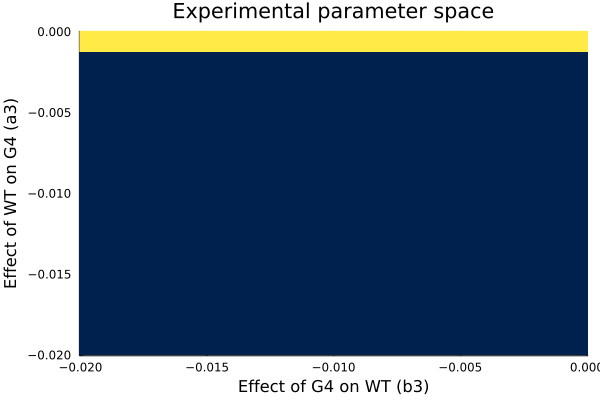

In [15]:
heatmap(a3_range, b3_range, viable_parameters_g4wt, c = :cividis, colorbar=false, xlabel = "Effect of G4 on WT (b3)",
ylabel = "Effect of WT on G4 (a3)", title = "Experimental parameter space")
# dark blue = not compatible with experimental results; yellow = compatible with experimental results


### Example 2B: G4 vs. D4.2

In [16]:
# G4 vs D4.2 - selection on G4
a2 = 1/48 ## a1/a2 is the carrying capacity of plasmid A
b2 = 2/117 ## b1/b2 is the carrying capacity of plasmid B
a0 = 1/a2
b0 = 1/b2


## Solving the predicted interaction across a large window of interaction parameters
a3_range = -0.02:0.0001:0  # sets up the range of the investigation
b3_range = -0.02:0.0001:0

results_A = zeros(length(a3_range), length(b3_range)) # prepares a matrix for entering the results
results_B = zeros(length(a3_range), length(b3_range))

for i = 1:length(a3_range)
    for j = 1:length(b3_range)
        a3 = a3_range[i]
        b3 = b3_range[j]
        p = [a1, a2, a3, b1, b2, b3]
        u0 = [a0, b0];
        tspan = (0.0, 100.0)  # gives the model 100 units of time to run
        problem = ODEProblem(two_plasmid_competition!, u0, tspan, p)
        solution = solve(problem, AutoVern7(Rodas5()), dt=0.1)

        results_A[i,j] = solution(100)[1]
        results_B[i,j] = solution(100)[2]     
    end
end

## Determining areas of co-existence
compatibility_g4tod42 = zeros(length(a3_range), length(b3_range)) # prepares a matrix for entering the results

for n = 1: length(results_A)
    if results_A[n] <= 1 || results_B[n] <= 1
        #= Because the system is continuous, it tolerates very small numbers which would have no real meaning
        in a discrete system. As such, we have used here a cut-off of 1, below which the discrete nature of the real system 
        would break down =#
        compatibility_g4tod42[n] = 0.0
    else
        compatibility_g4tod42[n] = 1.0
    end
end

# G4 vs D4.2 - selection on D4.2
a2 = 2/48 ## a1/a2 is the carrying capacity of plasmid A
b2 = 1/117 ## b1/b2 is the carrying capacity of plasmid B
a0 = 1/a2
b0 = 1/b2


## Solving the predicted interaction across a large window of interaction parameters
a3_range = -0.02:0.0001:0  # sets up the range of the investigation
b3_range = -0.02:0.0001:0

results_A = zeros(length(a3_range), length(b3_range)) # prepares a matrix for entering the results
results_B = zeros(length(a3_range), length(b3_range))

for i = 1:length(a3_range)
    for j = 1:length(b3_range)
        a3 = a3_range[i]
        b3 = b3_range[j]
        p = [a1, a2, a3, b1, b2, b3]
        u0 = [a0, b0];
        tspan = (0.0, 100.0)  # gives the model 100 units of time to run
        problem = ODEProblem(two_plasmid_competition!, u0, tspan, p)
        solution = solve(problem, AutoVern7(Rodas5()), dt=0.1)

        results_A[i,j] = solution(100)[1]
        results_B[i,j] = solution(100)[2]     
    end
end

## Determining areas of co-existence
compatibility_d42tog4 = zeros(length(a3_range), length(b3_range)) # prepares a matrix for entering the results

for n = 1: length(results_A)
    if results_A[n] <= 1 || results_B[n] <= 1
        #= Because the system is continuous, it tolerates very small numbers which would have no real meaning
        in a discrete system. As such, we have used here a cut-off of 1, below which the discrete nature of the real system 
        would break down =#
        compatibility_d42tog4[n] = 0.0
    else
        compatibility_d42tog4[n] = 1.0
    end
end

## Determining area of parameter space that explains the actual data

viable_parameters_g4d42 = zeros(length(a3_range), length(b3_range)) # starting an empty matrix

#= From experimental, we know that irrespective of selection, these plasmids remain compatible.
Therefore the viable parameter space is where compatibility_wttog4 is 1 and where compatibility_g4towt = 1 =#

for n = 1: length(compatibility_d42tog4)
    if compatibility_g4tod42[n] == 1.0 && compatibility_d42tog4[n] == 1.0
        viable_parameters_g4d42[n] = 1.0
    else
        viable_parameters_g4d42[n] = 0.0
    end
end

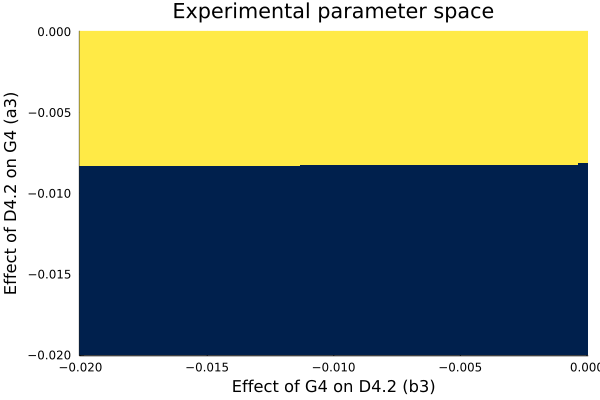

In [17]:
heatmap(a3_range, b3_range, viable_parameters_g4d42, c = :cividis, colorbar=false, xlabel = "Effect of G4 on D4.2 (b3)",
ylabel = "Effect of D4.2 on G4 (a3)", title = "Experimental parameter space")
# dark blue = not compatible with experimental results; yellow = compatible with experimental results


### Example 2C: WT vs. D4.2

In [18]:
# WT vs D4.2 - selection on WT
a2 = 1/774 ## a1/a2 is the carrying capacity of plasmid A
b2 = 2/117 ## b1/b2 is the carrying capacity of plasmid B
a0 = 1/a2
b0 = 1/b2


## Solving the predicted interaction across a large window of interaction parameters
a3_range = -0.02:0.0001:0  # sets up the range of the investigation
b3_range = -0.02:0.0001:0

results_A = zeros(length(a3_range), length(b3_range)) # prepares a matrix for entering the results
results_B = zeros(length(a3_range), length(b3_range))

for i = 1:length(a3_range)
    for j = 1:length(b3_range)
        a3 = a3_range[i]
        b3 = b3_range[j]
        p = [a1, a2, a3, b1, b2, b3]
        u0 = [a0, b0];
        tspan = (0.0, 100.0)  # gives the model 100 units of time to run
        problem = ODEProblem(two_plasmid_competition!, u0, tspan, p)
        solution = solve(problem, AutoVern7(Rodas5()), dt=0.1)

        results_A[i,j] = solution(100)[1]
        results_B[i,j] = solution(100)[2]     
    end
end

## Determining areas of co-existence
compatibility_wttod42 = zeros(length(a3_range), length(b3_range)) # prepares a matrix for entering the results

for n = 1: length(results_A)
    if results_A[n] <= 1 || results_B[n] <= 1
        #= Because the system is continuous, it tolerates very small numbers which would have no real meaning
        in a discrete system. As such, we have used here a cut-off of 1, below which the discrete nature of the real system 
        would break down =#
        compatibility_wttod42[n] = 0.0
    else
        compatibility_wttod42[n] = 1.0
    end
end

# WT vs D4.2 - selection on D4.2
a2 = 2/774 ## a1/a2 is the carrying capacity of plasmid A
b2 = 1/117 ## b1/b2 is the carrying capacity of plasmid B
a0 = 1/a2
b0 = 1/b2


## Solving the predicted interaction across a large window of interaction parameters
a3_range = -0.02:0.0001:0  # sets up the range of the investigation
b3_range = -0.02:0.0001:0

results_A = zeros(length(a3_range), length(b3_range)) # prepares a matrix for entering the results
results_B = zeros(length(a3_range), length(b3_range))

for i = 1:length(a3_range)
    for j = 1:length(b3_range)
        a3 = a3_range[i]
        b3 = b3_range[j]
        p = [a1, a2, a3, b1, b2, b3]
        u0 = [a0, b0];
        tspan = (0.0, 100.0)  # gives the model 100 units of time to run
        problem = ODEProblem(two_plasmid_competition!, u0, tspan, p)
        solution = solve(problem, AutoVern7(Rodas5()), dt=0.1)

        results_A[i,j] = solution(100)[1]
        results_B[i,j] = solution(100)[2]     
    end
end

## Determining areas of co-existence
compatibility_d42towt = zeros(length(a3_range), length(b3_range)) # prepares a matrix for entering the results

for n = 1: length(results_A)
    if results_A[n] <= 1 || results_B[n] <= 1
        #= Because the system is continuous, it tolerates very small numbers which would have no real meaning
        in a discrete system. As such, we have used here a cut-off of 1, below which the discrete nature of the real system 
        would break down =#
        compatibility_d42towt[n] = 0.0
    else
        compatibility_d42towt[n] = 1.0
    end
end

## Determining area of parameter space that explains the actual data

viable_parameters_wtd42 = zeros(length(a3_range), length(b3_range)) # starting an empty matrix

#= From experimental, we know that irrespective of selection, these plasmids remain compatible.
Therefore the viable parameter space is where compatibility_wttog4 is 1 and where compatibility_g4towt = 1 =#

for n = 1: length(compatibility_d42tog4)
    if compatibility_d42towt[n] == 1.0 && compatibility_wttod42[n] == 1.0
        viable_parameters_wtd42[n] = 1.0
    else
        viable_parameters_wtd42[n] = 0.0
    end
end

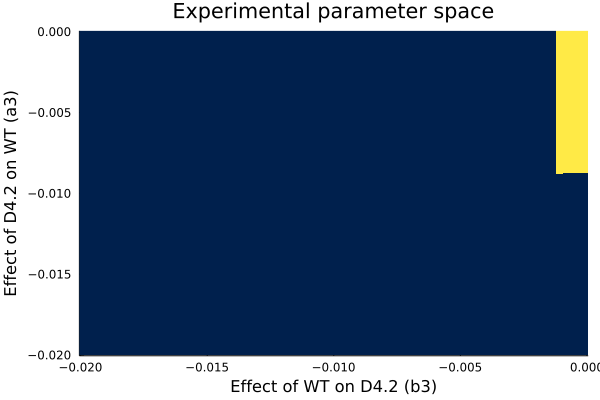

In [19]:
heatmap(a3_range, b3_range, viable_parameters_wtd42, c = :cividis, colorbar=false, xlabel = "Effect of WT on D4.2 (b3)",
ylabel = "Effect of D4.2 on WT (a3)", title = "Experimental parameter space")
# dark blue = not compatible with experimental results; yellow = compatible with experimental results


## Setting up a 3-population LV system

In [20]:
## 3-population LV system
function three_plasmid_competition!(du, u, p, t) ## 2-population generic LV system
    A, B, C = u
    a1, a2, a3, a4, b1, b2, b3, b5, c1, c2, c4, c5 = p
    du[1] = dA = a1*A - a2*A^2 + a3*A*B + a4*A*C
    #= To improve clarity, indexes were selected to facilitate interaction identification
    x3 for interactions between A and B, x4 for A and C, and x5 for B and C =#
    du[2] = dB = b1*B - b2*B^2 + b3*A*B + b5*B*C
    du[3] = dC = c1*C - c2*C^2 + c4*A*C + c5*B*C
end

three_plasmid_competition! (generic function with 1 method)

In [21]:
## Parameters
a1 = 1 # for simpliticy chosen as 1
b1 = 1
c1 = 1

a2 = 1/100 # a1/a2 is the carrying capacity of plasmid A
b2 = 1/100 # b1/b2 is the carrying capacity of plasmid B
c2 = 1/100 # c1/c2 is the carrying capacity of plasmid B

a3 = - 1/1000 ## impact of B on A
b3 = - 5/1000 ## impact of A on B
a4 = - 1/1000 ## impact of C on A
c4 = - 4/1000 ## impact of A on C
b5 = - 2/1000 ## impact of C on B
c5 = - 1/1000 ## impact of B on C

## Initial conditions
a0 = 1/a2
b0 = 1/b2
c0 = 1/c2

## Reformatting parameters for function 
p = [a1, a2, a3, a4, b1, b2, b3, b5, c1, c2, c4, c5]
u0 = [a0, b0, c0];

In [22]:
## Solution

#= While the LV system can be solved analytically, we provide here the numerical solution to avoid having to introduce error 
    checking for equilibrium positions that are not in the real positive space for both populations. =#
        tspan = (0.0, 100.0)  # gives the model 100 units of time to run
        problem = ODEProblem(three_plasmid_competition!, u0, tspan, p)
        solution = solve(problem, AutoVern7(Rodas5()), dt=0.1)
        
        solution(100)  ## returns the two plasmid populations at t = 100

3-element Vector{Float64}:
 89.70100057995595
 43.18937064960836
 59.80066705330398

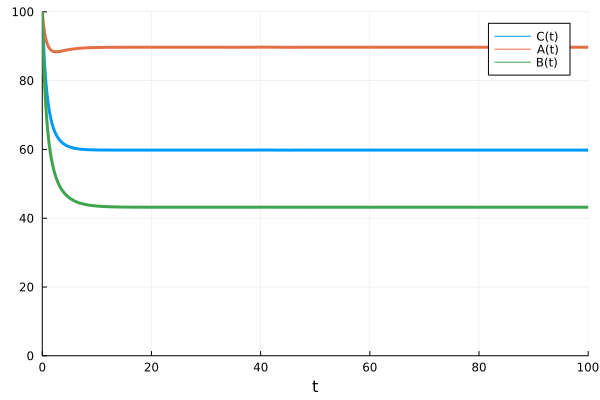

In [23]:
plot(solution, vars=(0,3), linewidth = 3, ylims = (0.0,max(a0,b0)), label = "C(t)")
plot!(solution, vars=(0,1), linewidth = 3, label = "A(t)")
plot!(solution, vars=(0,2), linewidth = 3, label = "B(t)")

In [24]:
## Solving the predicted interaction across a large window of interaction parameters
#= Unlike the 2-plasmid system with 2 parameters, the 3-plasmid system has a total of 6 parameters dealing with the interaction
between the origins. That makes it very difficult to explore all at once and to vizualise them all. Below, we show the impact of a
negative impact of plasmid C on plasmid A (i.e. a4) across a wide range of A and B interactions.=#

a3_range = -0.02:0.0002:0 
b3_range = -0.02:0.0002:0
a4_range = -0.02:0.0002:0

results_A = zeros(length(a3_range), length(b3_range), length(a4_range)) # prepares a tensor for entering the results
results_B = zeros(length(a3_range), length(b3_range), length(a4_range))
results_C = zeros(length(a3_range), length(b3_range), length(a4_range))

for i = 1:length(a3_range)
    for j = 1:length(b3_range)
        for k = 1: length(a4_range)
            a3 = a3_range[i]
            b3 = b3_range[j]
            a4 = a4_range[k]
            p = [a1, a2, a3, a4, b1, b2, b3, b5, c1, c2, c4, c5]
            u0 = [a0, b0, c0];
            tspan = (0.0, 100.0)  # gives the model 100 units of time to run
            problem = ODEProblem(three_plasmid_competition!, u0, tspan, p)
            solution = solve(problem, AutoVern7(Rodas5()), dt=0.1)

            results_A[i,j,k] = solution(100)[1]
            results_B[i,j,k] = solution(100)[2]   
            results_C[i,j,k] = solution(100)[3]  
        end
    end
end

┌ Info: Saved animation to 
│   fn = c:\Users\vbbpi\OneDrive - KU Leuven\50_Publications\21_New_plasmids\compatibility_3way.gif
└ @ Plots C:\Users\vbbpi\.julia\packages\Plots\1KWPG\src\animation.jl:114


Plots.AnimatedGif("c:\\Users\\vbbpi\\OneDrive - KU Leuven\\50_Publications\\21_New_plasmids\\compatibility_3way.gif")
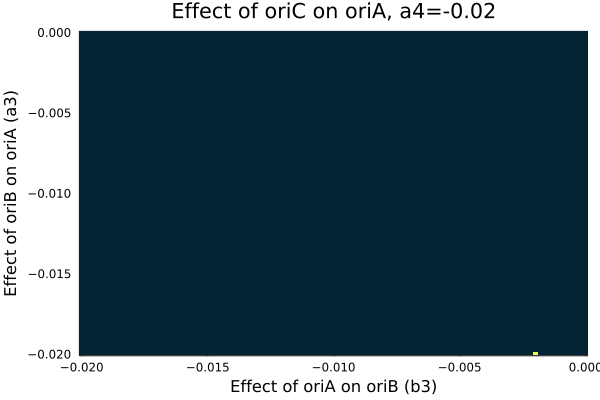

In [25]:
## Determining areas of co-exitence
compatibility_3way = zeros(length(a3_range), length(b3_range), length(a4_range)) # prepares a matrix for entering the results

for n = 1: length(results_A)
    if results_A[n] <= 1 || results_B[n] <= 1 || results_C[n] <= 1
        #= Because the system is continuous, it tolerates very small numbers which would have no real meaning
        in a discrete system. As such, we have used here a cut-off of 1, below which the discrete nature of the real system 
        would break down =#
        compatibility_3way[n] = 0.0
    else
        compatibility_3way[n] = 1.0
    end
end

## Vizualizing the impact of varying parameters on the population
steps = length(a4_range)
t = range(1, length(a4_range), length = steps)

anim = @animate for i ∈ 1:steps
    title_range = "Effect of oriC on oriA, a4=$(a4_range[i])"
    heatmap(a3_range, b3_range, compatibility_3way[i,:,:], c = :thermal, colorbar=false, xlabel = "Effect of oriA on oriB (b3)",
    ylabel = "Effect of oriB on oriA (a3)", title = title_range, clims=(0,1))
end
gif(anim, "compatibility_3way.gif", fps = 5)

# dark blue = not compatible with experimental results; yellow = compatible with experimental results

## Using 2-population data to analyse 3-population interactions

In [26]:
## Using two-plasmid ranges to look at 3 plasmid interactions
#= Experimental data sets out possible range of parameter values that relate to specific interactions between plasmids and therefore
these should remain constant for more complex systems =#

# Using WT(A), D4.2(B) and G4(C), we obtain the following ranges for the parameters From the data:
a3_range = -0.01:0.002:0
b3_range = -0.002:0.0005:0
a4_range = -0.02:0.004:0
c4_range = -0.002:0.0005:0
b5_range = -0.02:0.004:0
c5_range = -0.01:0.002:0

-0.01:0.002:0.0

In [27]:
compatibility_wt_d42_g4 = zeros(length(a3_range), length(b3_range), length(a4_range), length(c4_range),
 length(b5_range), length(c5_range));

 #= This creates an empty tensor with dimensions equal to the available ranges of parameters being considered.
 Because of the high dimensionality of the data, mapping the individual populations across this paramter landscape
 will not even be attemtped directly.

 Instead, calculations will focus on identifying the presence and size of viable parameter space for three experimental conditions, 
 while creating a list of possible solutions: =#

possible_param_wt_d42_g4 = Array{Array{Float64 , 1}, 1}(undef,0)

#=
 Example 3: G4, D4.2 and WT being cross-compatible (not the obtained data)
 Example 4: G4, D4.2 and WT leading to loss of G4 (when all populations are under selection)
 Example 5: G4, D4.2 and WT leading to loss of G4 (when only D4.2 is under selection)
 Example 6: G4, D4.2 and WT leading to loss of G4 (in the absence of selection)
 =#

Vector{Float64}[]

### Example 3: G4, D4.2 and WT compatible
This is a theoretical example not in agreement with our data (see SI Fig 9C)

In [28]:
## Example 3: G4, D42 and WT intercompatible
#= for all three populations to be compatible (while under selection), then there must be at least one set of interaction 
    parameters for which co-existence is possible, i.e. A(t), B(t) and C(t) all real and positive.
=#

for a = 1:length(a3_range)
    for b = 1:length(b3_range)
        for i = 1:length(a4_range)
            for j = 1:length(c4_range)
                for x = 1:length(b5_range)
                    for y = 1:length(c5_range)

                        a3 = a3_range[a]
                        b3 = b3_range[b]
                        a4 = a4_range[i]
                        b4 = c4_range[j]
                        b5 = b5_range[x]
                        c5 = c5_range[y]

                        a2 = 1/774
                        b2 = 1/117
                        c2 = 1/48

                        p = p = [a1, a2, a3, a4, b1, b2, b3, b5, c1, c2, c4, c5]
                        u0 = [a0, b0, c0];
                        tspan = (0.0, 100.0)  # gives the model 100 units of time to run
                        problem = ODEProblem(three_plasmid_competition!, u0, tspan, p)
                        solution = solve(problem, AutoVern7(Rodas5()), dt=0.1)

                        if solution(100)[1] > 1 && solution(100)[2] > 1 && solution(100)[3] > 1
                            compatibility_wt_d42_g4[a,b,i,j,x,y] = 1.0
                            append!(possible_param_wt_d42_g4, [[a3, b3, a4, c4, b5, c5]])
                        else
                            compatibility_wt_d42_g4[a,b,i,j,x,y] = 0.0
                        end
                    end
                end
            end
        end
    end
end


In [29]:
solution_found_3way = sum(compatibility_wt_d42_g4) 
#= Since each viable solution is assigned the value of 1.0, then the sum gives the number of possible combinations tested 
for which the conditions are valid =#

2165.0

In [30]:
solution_fraction_3way = solution_found_3way/length(compatibility_wt_d42_g4)
#= This yields the fraction of the sampled space that is viable
=#

0.06682098765432098

In [31]:
possible_param_wt_d42_g4
#= this returns a list of parameter combinations that fulfil the selection criteria (here in Example 3 - all plasmids co-existing) =#

2165-element Vector{Vector{Float64}}:
 [-0.01, -0.002, -0.02, -0.004, -0.02, -0.004]
 [-0.01, -0.002, -0.02, -0.004, -0.02, -0.002]
 [-0.01, -0.002, -0.02, -0.004, -0.02, 0.0]
 [-0.01, -0.002, -0.02, -0.004, -0.02, -0.004]
 [-0.01, -0.002, -0.02, -0.004, -0.02, -0.002]
 [-0.01, -0.002, -0.02, -0.004, -0.02, 0.0]
 [-0.01, -0.002, -0.02, -0.004, -0.02, -0.004]
 [-0.01, -0.002, -0.02, -0.004, -0.02, -0.002]
 [-0.01, -0.002, -0.02, -0.004, -0.02, 0.0]
 [-0.01, -0.002, -0.02, -0.004, -0.02, -0.004]
 ⋮
 [-0.004, 0.0, -0.016, -0.004, -0.008, 0.0]
 [-0.004, 0.0, -0.016, -0.004, -0.008, 0.0]
 [-0.004, 0.0, -0.016, -0.004, -0.008, 0.0]
 [-0.004, 0.0, -0.016, -0.004, -0.008, 0.0]
 [-0.002, -0.0005, -0.02, -0.004, -0.008, 0.0]
 [-0.002, -0.0005, -0.02, -0.004, -0.008, 0.0]
 [-0.002, -0.0005, -0.02, -0.004, -0.008, 0.0]
 [-0.002, -0.0005, -0.02, -0.004, -0.008, 0.0]
 [-0.002, -0.0005, -0.02, -0.004, -0.008, 0.0]

### Example 4: G4, D4.2 and WT leading to loss of G4 (when all populations are under selection)

In [32]:
# Example 4: G4, D4.2 and WT leading to loss of G4 (when all populations are under selection)
compatibility_wt_d42_nog4 = zeros(length(a3_range), length(b3_range), length(a4_range), length(c4_range),
 length(b5_range), length(c5_range))
possible_param_wt_d42_nog4 = Array{Array{Float64 , 1}, 1}(undef,0)


for a = 1:length(a3_range)
    for b = 1:length(b3_range)
        for i = 1:length(a4_range)
            for j = 1:length(c4_range)
                for x = 1:length(b5_range)
                    for y = 1:length(c5_range)

                        a3 = a3_range[a]
                        b3 = b3_range[b]
                        a4 = a4_range[i]
                        b4 = c4_range[j]
                        b5 = b5_range[x]
                        c5 = c5_range[y]

                        a2 = 1/774
                        b2 = 1/117
                        c2 = 1/48

                        p = p = [a1, a2, a3, a4, b1, b2, b3, b5, c1, c2, c4, c5]
                        u0 = [a0, b0, c0];
                        tspan = (0.0, 100.0)  # gives the model 100 units of time to run
                        problem = ODEProblem(three_plasmid_competition!, u0, tspan, p)
                        solution = solve(problem, AutoVern7(Rodas5()), dt=0.1)

                        if solution(100)[1] > 1 && solution(100)[2] > 1 && solution(100)[3] < 1
                            compatibility_wt_d42_nog4[a,b,i,j,x,y] = 1.0
                            append!(possible_param_wt_d42_nog4, [[a3, b3, a4, c4, b5, c5]])
                        else
                            compatibility_wt_d42_nog4[a,b,i,j,x,y] = 0.0
                        end
                    end
                end
            end
        end
    end
end



In [33]:
solution_found_3way_nog4 = sum(compatibility_wt_d42_nog4) 
#= Since each viable solution is assigned the value of 1.0, then the sum gives the number of possible combinations tested 
for which the conditions are valid =#

13725.0

In [34]:
solution_fraction_3way_nog4 = solution_found_3way_nog4/length(compatibility_wt_d42_nog4)
#= This yields the fraction of the sampled space that is viable
=#

0.4236111111111111

In [35]:
possible_param_wt_d42_nog4
#= this returns a list of parameter combinations that fulfil the selection criteria (here in Example 3 - all plasmids co-existing) =#

13725-element Vector{Vector{Float64}}:
 [-0.01, -0.0015, -0.016, -0.004, -0.02, -0.004]
 [-0.01, -0.0015, -0.016, -0.004, -0.02, -0.004]
 [-0.01, -0.0015, -0.016, -0.004, -0.02, -0.004]
 [-0.01, -0.0015, -0.016, -0.004, -0.02, -0.004]
 [-0.01, -0.0015, -0.016, -0.004, -0.02, -0.004]
 [-0.01, -0.0015, -0.008, -0.004, -0.016, -0.002]
 [-0.01, -0.0015, -0.008, -0.004, -0.016, -0.002]
 [-0.01, -0.0015, -0.008, -0.004, -0.016, -0.002]
 [-0.01, -0.0015, -0.008, -0.004, -0.016, -0.002]
 [-0.01, -0.0015, -0.008, -0.004, -0.016, -0.002]
 ⋮
 [0.0, 0.0, 0.0, -0.004, -0.004, -0.004]
 [0.0, 0.0, 0.0, -0.004, -0.004, -0.002]
 [0.0, 0.0, 0.0, -0.004, -0.004, 0.0]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.01]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.008]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.006]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.004]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.002]
 [0.0, 0.0, 0.0, -0.004, 0.0, 0.0]

### Example 5: G4, D4.2 and WT leading to loss of G4 (when only D4.2 is under selection)

In [36]:
# Example 5: G4, D4.2 and WT leading to loss of G4 (when only D4.2 is under selection)
compatibility_wt_d42_nog4_2 = zeros(length(a3_range), length(b3_range), length(a4_range), length(c4_range),
 length(b5_range), length(c5_range))
possible_param_wt_d42_nog4_2 = Array{Array{Float64 , 1}, 1}(undef,0)


for a = 1:length(a3_range)
    for b = 1:length(b3_range)
        for i = 1:length(a4_range)
            for j = 1:length(c4_range)
                for x = 1:length(b5_range)
                    for y = 1:length(c5_range)

                        a3 = a3_range[a]
                        b3 = b3_range[b]
                        a4 = a4_range[i]
                        b4 = c4_range[j]
                        b5 = b5_range[x]
                        c5 = c5_range[y]

                        a2 = 2/774
                        b2 = 1/117
                        c2 = 2/48

                        p = p = [a1, a2, a3, a4, b1, b2, b3, b5, c1, c2, c4, c5]
                        u0 = [a0, b0, c0];
                        tspan = (0.0, 100.0)  # gives the model 100 units of time to run
                        problem = ODEProblem(three_plasmid_competition!, u0, tspan, p)
                        solution = solve(problem, AutoVern7(Rodas5()), dt=0.1)

                        if solution(100)[1] > 1 && solution(100)[2] > 1 && solution(100)[3] < 1
                            compatibility_wt_d42_nog4_2[a,b,i,j,x,y] = 1.0
                            append!(possible_param_wt_d42_nog4_2, [[a3, b3, a4, c4, b5, c5]])
                        else
                            compatibility_wt_d42_nog4_2[a,b,i,j,x,y] = 0.0
                        end
                    end
                end
            end
        end
    end
end



In [37]:
solution_found_3way_nog4_2 = sum(compatibility_wt_d42_nog4_2) 
#= Since each viable solution is assigned the value of 1.0, then the sum gives the number of possible combinations tested 
for which the conditions are valid =#

21300.0

In [38]:
solution_fraction_3way_nog4_2 = solution_found_3way_nog4_2/length(compatibility_wt_d42_nog4_2)
#= This yields the fraction of the sampled space that is viable
=#

0.6574074074074074

In [39]:
possible_param_wt_d42_nog4_2
#= this returns a list of parameter combinations that fulfil the selection criteria (here in Example 3 - all plasmids co-existing) =#

21300-element Vector{Vector{Float64}}:
 [-0.008, -0.002, -0.02, -0.004, -0.02, -0.01]
 [-0.008, -0.002, -0.02, -0.004, -0.02, -0.008]
 [-0.008, -0.002, -0.02, -0.004, -0.016, -0.01]
 [-0.008, -0.002, -0.02, -0.004, -0.016, -0.008]
 [-0.008, -0.002, -0.02, -0.004, -0.012, -0.01]
 [-0.008, -0.002, -0.02, -0.004, -0.012, -0.008]
 [-0.008, -0.002, -0.02, -0.004, -0.008, -0.01]
 [-0.008, -0.002, -0.02, -0.004, -0.008, -0.008]
 [-0.008, -0.002, -0.02, -0.004, -0.004, -0.01]
 [-0.008, -0.002, -0.02, -0.004, -0.004, -0.008]
 ⋮
 [0.0, 0.0, 0.0, -0.004, -0.004, -0.004]
 [0.0, 0.0, 0.0, -0.004, -0.004, -0.002]
 [0.0, 0.0, 0.0, -0.004, -0.004, 0.0]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.01]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.008]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.006]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.004]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.002]
 [0.0, 0.0, 0.0, -0.004, 0.0, 0.0]

### Example 6: G4, D4.2 and WT leading to loss of G4 (in the absence of selection)

In [40]:
# Example 6: G4, D4.2 and WT leading to loss of G4 (in the absence of selection)
compatibility_wt_d42_nog4_noab = zeros(length(a3_range), length(b3_range), length(a4_range), length(c4_range),
 length(b5_range), length(c5_range))
possible_param_wt_d42_nog4_noab = Array{Array{Float64 , 1}, 1}(undef,0)


for a = 1:length(a3_range)
    for b = 1:length(b3_range)
        for i = 1:length(a4_range)
            for j = 1:length(c4_range)
                for x = 1:length(b5_range)
                    for y = 1:length(c5_range)

                        a3 = a3_range[a]
                        b3 = b3_range[b]
                        a4 = a4_range[i]
                        b4 = c4_range[j]
                        b5 = b5_range[x]
                        c5 = c5_range[y]

                        a2 = 2/774
                        b2 = 2/117
                        c2 = 2/48

                        p = p = [a1, a2, a3, a4, b1, b2, b3, b5, c1, c2, c4, c5]
                        u0 = [a0, b0, c0];
                        tspan = (0.0, 100.0)  # gives the model 100 units of time to run
                        problem = ODEProblem(three_plasmid_competition!, u0, tspan, p)
                        solution = solve(problem, AutoVern7(Rodas5()), dt=0.1)

                        if solution(100)[1] > 1 && solution(100)[2] > 1 && solution(100)[3] < 1
                            compatibility_wt_d42_nog4_noab[a,b,i,j,x,y] = 1.0
                            append!(possible_param_wt_d42_nog4_noab, [[a3, b3, a4, c4, b5, c5]])
                        else
                            compatibility_wt_d42_nog4_noab[a,b,i,j,x,y] = 0.0
                        end
                    end
                end
            end
        end
    end
end

solution_found_3way_nog4_noab = sum(compatibility_wt_d42_nog4_noab) 
solution_fraction_3way_nog4_noab = solution_found_3way_nog4_noab/length(compatibility_wt_d42_nog4_noab)
possible_param_wt_d42_nog4_noab


30275-element Vector{Vector{Float64}}:
 [-0.01, -0.002, -0.02, -0.004, -0.02, -0.01]
 [-0.01, -0.002, -0.02, -0.004, -0.02, -0.008]
 [-0.01, -0.002, -0.02, -0.004, -0.02, -0.006]
 [-0.01, -0.002, -0.02, -0.004, -0.02, -0.004]
 [-0.01, -0.002, -0.02, -0.004, -0.02, -0.002]
 [-0.01, -0.002, -0.02, -0.004, -0.02, 0.0]
 [-0.01, -0.002, -0.02, -0.004, -0.016, -0.01]
 [-0.01, -0.002, -0.02, -0.004, -0.016, -0.008]
 [-0.01, -0.002, -0.02, -0.004, -0.016, -0.006]
 [-0.01, -0.002, -0.02, -0.004, -0.016, -0.004]
 ⋮
 [0.0, 0.0, 0.0, -0.004, -0.004, -0.004]
 [0.0, 0.0, 0.0, -0.004, -0.004, -0.002]
 [0.0, 0.0, 0.0, -0.004, -0.004, 0.0]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.01]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.008]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.006]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.004]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.002]
 [0.0, 0.0, 0.0, -0.004, 0.0, 0.0]

## Combining multiple datasets to further refine parameter estimation

In [41]:
#= Because we have selections with full antibiotics, with only chloramphenicol, and without antibiotics, we can intersect the different 
sets of parameters to further restrict the range of possible parameters.

Paramter sets (let it be called p_possible) compatible with all the data generated will be:
    p_possible ∈ possible_param_wt_d42_nog4
    p_possible ∈ possible_param_wt_d42_nog4_2
    p_possible ∈ possible_param_wt_d42_nog4_noab

=#
p_possible = intersect(possible_param_wt_d42_nog4, possible_param_wt_d42_nog4_noab, possible_param_wt_d42_nog4_2)


2441-element Vector{Vector{Float64}}:
 [-0.008, -0.002, -0.02, -0.004, 0.0, -0.008]
 [-0.008, -0.0015, -0.02, -0.004, -0.008, -0.008]
 [-0.008, -0.0015, -0.02, -0.004, -0.004, -0.008]
 [-0.008, -0.0015, -0.02, -0.004, 0.0, -0.008]
 [-0.008, -0.0015, -0.016, -0.004, 0.0, -0.008]
 [-0.008, -0.001, -0.02, -0.004, -0.02, -0.01]
 [-0.008, -0.001, -0.02, -0.004, -0.02, -0.008]
 [-0.008, -0.001, -0.02, -0.004, -0.016, -0.01]
 [-0.008, -0.001, -0.02, -0.004, -0.016, -0.008]
 [-0.008, -0.001, -0.02, -0.004, -0.012, -0.01]
 ⋮
 [0.0, 0.0, 0.0, -0.004, -0.004, -0.004]
 [0.0, 0.0, 0.0, -0.004, -0.004, -0.002]
 [0.0, 0.0, 0.0, -0.004, -0.004, 0.0]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.01]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.008]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.006]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.004]
 [0.0, 0.0, 0.0, -0.004, 0.0, -0.002]
 [0.0, 0.0, 0.0, -0.004, 0.0, 0.0]

In [42]:
#= Assuming that the continuous selection of antibiotics must yield cells with all 3 plasmids (i.e. SI Figure 9C being wrong), then
paramter sets (let it be called p_possible2) compatible with all the data generated will be:
    p_possible2 ∈ possible_param_wt_d42_g4
    p_possible2 ∈ possible_param_wt_d42_nog4_2
    p_possible2 ∈ possible_param_wt_d42_nog4_noab

resulting in: =#
p_possible = intersect(possible_param_wt_d42_g4, possible_param_wt_d42_nog4_noab, possible_param_wt_d42_nog4_2)


2-element Vector{Vector{Float64}}:
 [-0.006, -0.001, -0.016, -0.004, -0.004, -0.004]
 [-0.002, -0.0005, -0.02, -0.004, -0.008, 0.0]

In [43]:
#= In conclusion, LV sysmtes are able to fully explain the data providing testable hypotheses that can be further explored in the lab.
Crucially, it permits interaction between plasmids to be asymmetric (i.e. orthogonality itself is directional) and quantitative. It is 
also likely that robustness of the system can be linked to the permissible parameter space and to how metabolic burdens lead to fluctuation
on the number of plasmids per cell. =#